In [8]:
import pandas as pd

results = []
for i in range(1,12):
    results.append(pd.read_csv(f'data/res/subject_{i}_results.csv'))

results_df = pd.concat(results)

In [9]:
results_df.dtypes

Subject           int64
Channel          object
Num_Features      int64
Metric           object
Value           float64
dtype: object

In [10]:
results_df

,Subject,Channel,Num_Features,Metric,Value
0,1,AF7,10,train_acc,0.583531
1,1,AF7,10,test_acc,0.558983
2,1,AF7,10,f1_score,0.542316
3,1,AF8,10,train_acc,0.572178
4,1,AF8,10,test_acc,0.548601
...,...,...,...,...,...
370,11,TP10,250,test_acc,0.603135
371,11,TP10,250,f1_score,0.695512
372,11,Combined,250,train_acc,0.696004
373,11,Combined,250,test_acc,0.657333


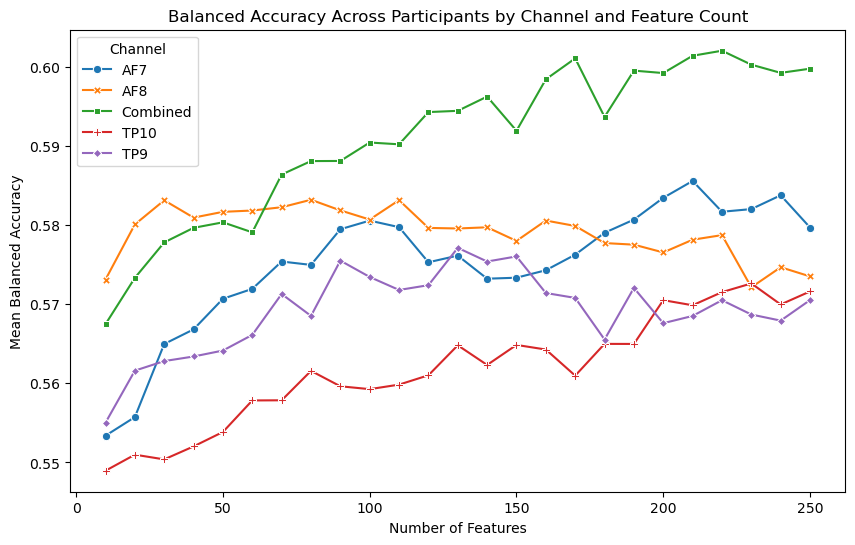

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean Balanced Accuracy
mean_bal_acc = results_df[(results_df['Metric'] == 'test_acc')
 #&(results_df['Subject'].isin([5]))
 #& (~results_df['Subject'].isin([2, 9, 5]))
].groupby(['Channel', 'Num_Features'])['Value'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_bal_acc, x='Num_Features', y='Value', hue='Channel', style='Channel', markers=True, dashes=False)
plt.title('Balanced Accuracy Across Participants by Channel and Feature Count')
plt.xlabel('Number of Features')
plt.ylabel('Mean Balanced Accuracy')
plt.legend(title='Channel')
plt.show()

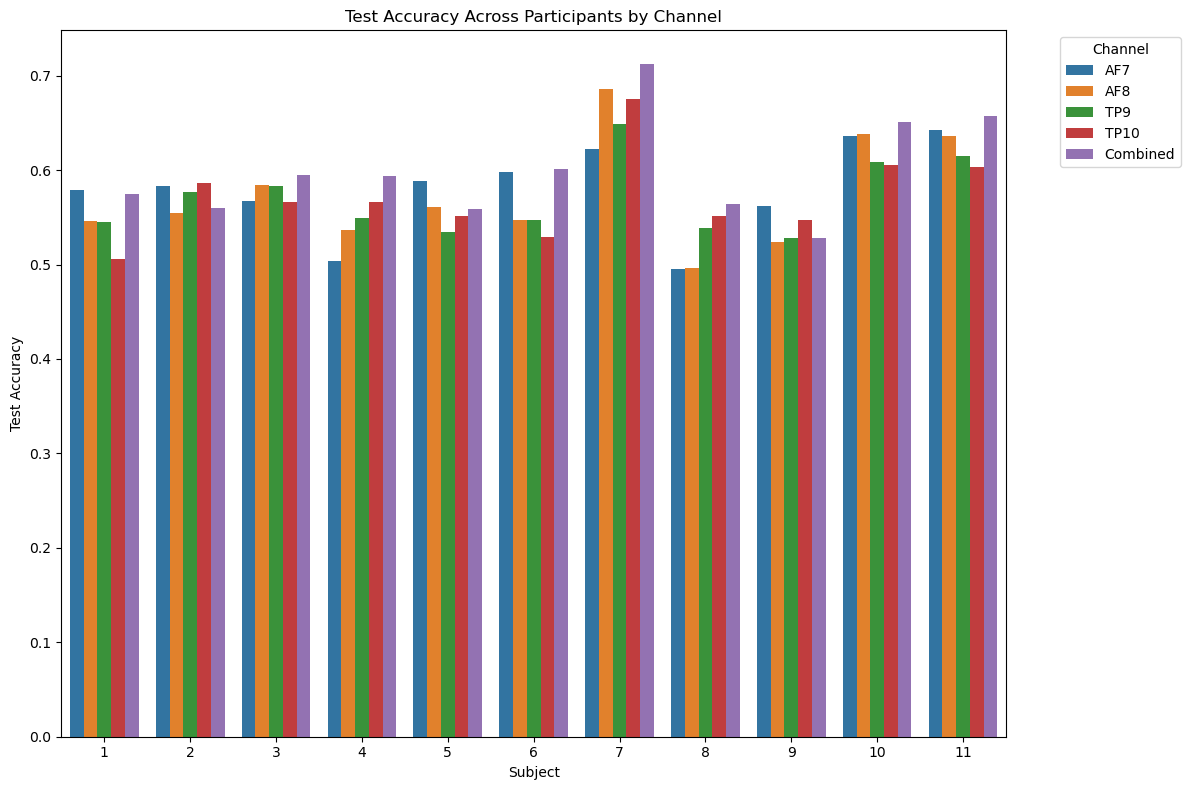

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = results_df[(results_df['Metric'] == 'test_acc') 
& (results_df['Num_Features'] == 250)
]

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=plot_data, x='Subject', y='Value', hue='Channel', errorbar=None)

# Adding plot title and labels
plt.title('Test Accuracy Across Participants by Channel')
plt.xlabel('Subject')
plt.ylabel('Test Accuracy')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


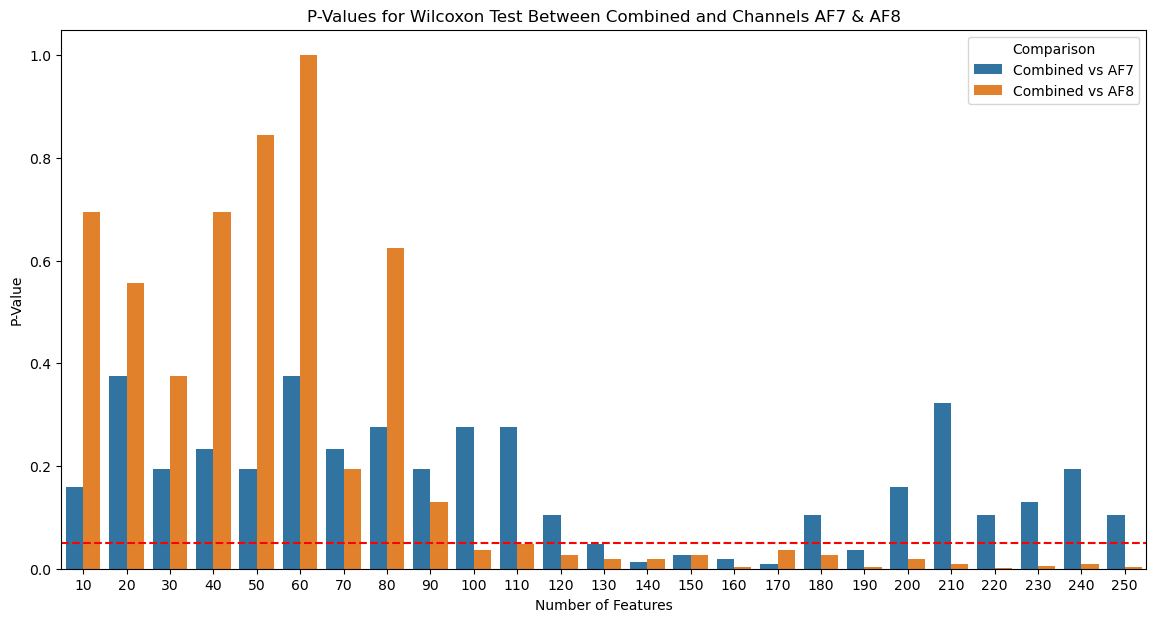

In [7]:
import pandas as pd
from scipy.stats import wilcoxon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming results_df is your DataFrame
# Filter data for 'test_acc' metric, required channels, and excluding specific subjects
channels = ['AF7', 'AF8', 'Combined']
filtered_data = results_df[(results_df['Metric'] == 'test_acc') & 
                           (results_df['Channel'].isin(channels))
                          & (~results_df['Subject'].isin([ 5, 9]))
                            ]

# Prepare a dictionary to store results
wilcoxon_results = {'Num_Features': [], 'Comparison': [], 'Statistic': [], 'P-Value': []}

# Group by Num_Features to perform tests
grouped = filtered_data.groupby('Num_Features')

for name, group in grouped:
    combined_data = group[group['Channel'] == 'Combined']['Value']
    af7_data = group[group['Channel'] == 'AF7']['Value']
    af8_data = group[group['Channel'] == 'AF8']['Value']
    
    if len(combined_data) > 1 and len(af7_data) > 1:
        stat, p_value = wilcoxon(combined_data, af7_data, alternative='two-sided', zero_method='wilcox')
        wilcoxon_results['Num_Features'].append(name)
        wilcoxon_results['Comparison'].append('Combined vs AF7')
        wilcoxon_results['Statistic'].append(stat)
        wilcoxon_results['P-Value'].append(p_value)
        
    if len(combined_data) > 1 and len(af8_data) > 1:
        stat, p_value = wilcoxon(combined_data, af8_data, alternative='two-sided', zero_method='wilcox')
        wilcoxon_results['Num_Features'].append(name)
        wilcoxon_results['Comparison'].append('Combined vs AF8')
        wilcoxon_results['Statistic'].append(stat)
        wilcoxon_results['P-Value'].append(p_value)

# Convert results to DataFrame for easier reading and rename to avoid confusion
significance_df = pd.DataFrame(wilcoxon_results)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=significance_df, x='Num_Features', y='P-Value', hue='Comparison')
plt.title('P-Values for Wilcoxon Test Between Combined and Channels AF7 & AF8')
plt.ylabel('P-Value')
plt.xlabel('Number of Features')
plt.axhline(0.05, color='red', linestyle='--')  # Significance threshold line
plt.legend(title='Comparison')
plt.show()